In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
#Cargue de la base de datos completa de PQR

import gdown

# ID del archivo en Google Drive
file_id = "1SPP8YXrbY907GnTh2SmyA2Ak51mvbyaT"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar el archivo
gdown.download(url, "archivo.csv", quiet=False)

# Cargar en DataFrame
df = pd.read_csv("archivo.csv", sep=",")
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=1SPP8YXrbY907GnTh2SmyA2Ak51mvbyaT
From (redirected): https://drive.google.com/uc?id=1SPP8YXrbY907GnTh2SmyA2Ak51mvbyaT&confirm=t&uuid=72057052-587f-41b0-a914-4da3c1aef8a0
To: /content/archivo.csv
100%|██████████| 2.00G/2.00G [00:24<00:00, 81.2MB/s]


,OBJECTID,periodo,mes,pqr_canal,pet_cod_depto,pet_cod_mpio,id_afec,afec_parentesco,afec_genero,afec_edad,...,motivo_especifico,cod_tipo_motesp,tipo_de_motivo_especifico,cod_subtipo_motesp,subtipo_de_motivo_especifico,patologia_1,patologia_tipo,cie_10,alto_costo,clasificacion_de_riesgo
0,1,2023,7,Personalizado,11.0,11001.0,US- 000002456900,A nombre propio,HOMBRE,69,...,FALTA DE OPORTUNIDAD EN LA ATENCIÓN EN OTROS S...,1010308.0,PROCEDIMIENTOS NO QUIRÚRGICOS,1.010308e+09,IMAGENOLOGÍA,ENFERMEDADES CRÓNICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSIÓN ARTERIAL),"HERNIA ABDOMINAL NO ESPECIFICADA, SIN OBSTRUCC...",No aplica,SIMPLE
1,2,2023,7,Web,11.0,11001.0,US- 000002368140,A nombre propio,MUJER,35,...,FALLAS O IRREGULARIDADES EN EL MANEJO TÉCNICO ...,NaN,NaN,NaN,NaN,ENFERMEDADES HUÉRFANAS,OTROS,"ENFERMEDAD DE CROHN, NO ESPECIFICADA",No aplica,PRIORIZADO
2,3,2023,7,Personalizado,70.0,70702.0,US- 000003298634,A nombre propio,MUJER,77,...,FALTA DE OPORTUNIDAD EN LA AUTORIZACIÓN DE TEC...,1030101.0,MEDICAMENTOS UPC,NaN,NaN,ENFERMEDADES CRÓNICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSIÓN ARTERIAL),DIABETES MELLITUS INSULINODEPENDIENTE,No aplica,PRIORIZADO
3,4,2023,7,Escrito,76.0,76892.0,US- 000003300829,Otro,HOMBRE,71,...,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,1010401.0,MEDICAMENTOS UPC,NaN,NaN,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,No aplica,SIMPLE
4,5,2023,7,Personalizado,8.0,8001.0,US- 000003286661,A nombre propio,MUJER,48,...,FALTA DE OPORTUNIDAD EN LA AUTORIZACIÓN DE OTR...,1030409.0,PROCEDIMIENTOS QUIRÚRGICOS,1.030409e+09,OTROS PROCEDIMIENTOS QUIRÚRGICOS,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,PROBLEMAS RELACIONADOS CON FACILIDADES DE ATEN...,"HEMORRAGIA VAGINAL Y UTERINA ANORMAL, NO ESPEC...",No aplica,SIMPLE


In [4]:
#Validación de los datos
print(df.head())
print(df.shape)

  OBJECTID periodo mes      pqr_canal pet_cod_depto pet_cod_mpio  \
0        1    2023   7  Personalizado            11        11001   
1        2    2023   7            Web            11        11001   
2        3    2023   7  Personalizado            70        70702   
3        4    2023   7        Escrito            76        76892   
4        5    2023   7  Personalizado            08        08001   

            id_afec  afec_parentesco afec_genero afec_edad  ...  \
0  US- 000002456900  A nombre propio      HOMBRE        69  ...   
1  US- 000002368140  A nombre propio       MUJER        35  ...   
2  US- 000003298634  A nombre propio       MUJER        77  ...   
3  US- 000003300829             Otro      HOMBRE        71  ...   
4  US- 000003286661  A nombre propio       MUJER        48  ...   

                                   motivo_especifico cod_tipo_motesp  \
0  FALTA DE OPORTUNIDAD EN LA ATENCIÓN EN OTROS S...        01010308   
1  FALLAS O IRREGULARIDADES EN EL MANEJO TÉC

In [5]:
#Convertir los nombres de las columnas a minúscula y reemplazar los espacios por guión bajo
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
#Se realizó la estandarización de los nombres de las variables, corrigiendo problemas de codificación y adoptando nombres descriptivos y consistentes.
df = df.rename(columns={
    "objectid" : "id_registro",
    "pqr_canal": "canal_pqr",
    "pet_cod_depto": "cod_depto_peticion",
    "pet_cod_mpio": "cod_mpio_peticion",
    "id_afec": "id_afectado",
    "afec_parentesco": "parentesco_afectado",
    "afec_genero": "genero_afectado",
    "afec_edadr": "rango_edad_afectado",
    "afec_educ": "nivel_educativo_afectado",
    "afec_regafiliacion": "regimen_afiliacion_afectado",
    "afec_getnico": "grupo_etnico_afectado",
    "afec_pobespecial": "poblacion_especial_afectado",
    "afec_cod_depto": "cod_depto_afectado",
    "afec_cod_mpio": "cod_mpio_afectado",
    "ent_nombre": "nombre_entidad",
    "ent_tipovig_sns": "tipo_vigencia_sns",
    "ent_cod_sns": "codigo_sns_entidad",
    "ent_alias_sns": "alias_entidad",
    "clasificacion_de_riesgo" : "riesgo_vida"
})



In [7]:
#Validar nombre de las columnas
df.columns

Index(['id_registro', 'periodo', 'mes', 'canal_pqr', 'cod_depto_peticion',
       'cod_mpio_peticion', 'id_afectado', 'parentesco_afectado',
       'genero_afectado', 'afec_edad', 'rango_edad_afectado',
       'nivel_educativo_afectado', 'regimen_afiliacion_afectado',
       'grupo_etnico_afectado', 'poblacion_especial_afectado',
       'cod_depto_afectado', 'cod_mpio_afectado', 'nombre_entidad',
       'tipo_vigencia_sns', 'codigo_sns_entidad', 'ent_alias_sn',
       'ent_cod_depto', 'ent_cod_mpio', 'cod_macromot', 'macromotivo',
       'cod_motgen', 'motivo_general', 'cod_motesp', 'motivo_especifico',
       'cod_tipo_motesp', 'tipo_de_motivo_especifico', 'cod_subtipo_motesp',
       'subtipo_de_motivo_especifico', 'patologia_1', 'patologia_tipo',
       'cie_10', 'alto_costo', 'riesgo_vida'],
      dtype='object')

Se realiza la limpieza de los datos, eliminando las columnas que no son necesarias y agregando una categoría para los datos faltantes

In [8]:
df.isnull().sum()

,0
id_registro,0
periodo,0
mes,0
canal_pqr,0
cod_depto_peticion,5280
cod_mpio_peticion,5280
id_afectado,0
parentesco_afectado,0
genero_afectado,0
afec_edad,0


In [9]:
cols_eliminar = [
    'cod_tipo_motesp',
    'tipo_de_motivo_especifico',
    'cod_subtipo_motesp',
    'subtipo_de_motivo_especifico'
]

df = df.drop(columns=cols_eliminar)

In [10]:
cols_int = [
    'periodo',
    'mes',
    'cod_depto_peticion',
    'cod_mpio_peticion',
    'afec_edad',
    'ent_cod_depto',
    'ent_cod_mpio'
]

In [11]:
df[cols_int] = (
    df[cols_int]
      .apply(pd.to_numeric, errors='coerce')
      .astype('Int64')
)

In [12]:
# Mostrar todos los valores únicos de la columna
df['cod_depto_peticion'].unique()

<IntegerArray>
[  11,   70,   76,    8,    5,   68,   47,   25,   41,   13,   73,   63,   17,
   15,   18,   66,   85,   23,   52,   54,   50,   81,   19,   20,   86,   44,
   95,   97, <NA>,   99,   27,   94,   88,   91]
Length: 34, dtype: Int64

In [13]:
#Filtrar la base solamente por el departamento de Cundinamarca
df_cundinamarca = df[df["cod_depto_peticion"] == 25]


In [14]:
#Información de la base seleccionada
df_cundinamarca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155244 entries, 12 to 2702760
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   id_registro                  155244 non-null  object
 1   periodo                      155244 non-null  Int64 
 2   mes                          155244 non-null  Int64 
 3   canal_pqr                    155244 non-null  object
 4   cod_depto_peticion           155244 non-null  Int64 
 5   cod_mpio_peticion            155244 non-null  Int64 
 6   id_afectado                  155244 non-null  object
 7   parentesco_afectado          155244 non-null  object
 8   genero_afectado              155244 non-null  object
 9   afec_edad                    155244 non-null  Int64 
 10  rango_edad_afectado          155244 non-null  object
 11  nivel_educativo_afectado     155244 non-null  object
 12  regimen_afiliacion_afectado  155244 non-null  object
 13  grupo_etnico_afec

In [15]:
#Cantidad de filas y columnas
df_cundinamarca.shape

(155244, 34)

In [16]:
#Descripción estadística de la información
df_cundinamarca.describe()

,periodo,mes,cod_depto_peticion,cod_mpio_peticion,afec_edad,ent_cod_depto,ent_cod_mpio
count,155244.0,155244.0,155244.0,155244.0,155244.0,155244.0,155244.0
mean,2024.113988,7.138711,25.0,25517.900718,47.201663,23.486537,23927.722083
std,0.809634,3.312699,0.0,260.358322,23.712618,6.617125,6736.176468
min,2023.0,1.0,25.0,25001.0,0.0,5.0,5001.0
25%,2023.0,4.0,25.0,25286.0,29.0,25.0,25175.0
50%,2024.0,8.0,25.0,25473.0,50.0,25.0,25386.0
75%,2025.0,10.0,25.0,25754.0,66.0,25.0,25754.0
max,2025.0,12.0,25.0,25899.0,113.0,99.0,99773.0


In [17]:
#Validación de duplicados
df_cundinamarca.duplicated().sum()
df_cundinamarca[df_cundinamarca.duplicated()]

,id_registro,periodo,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,afec_edad,...,macromotivo,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,alto_costo,riesgo_vida


In [18]:
#Revisión de valores nulos
df_cundinamarca.isnull().sum()

,0
id_registro,0
periodo,0
mes,0
canal_pqr,0
cod_depto_peticion,0
cod_mpio_peticion,0
id_afectado,0
parentesco_afectado,0
genero_afectado,0
afec_edad,0


In [19]:
df_cundinamarca["riesgo_vida"].value_counts()

,count
riesgo_vida,
SIMPLE,111246
PRIORIZADO,43203
RIESGO VITAL,795


In [30]:
df_cundinamarca['riesgo_vida'] = df_cundinamarca['riesgo_vida'].replace({'RIESGO VITAL': 'PRIORIZADO'})

/tmp/ipython-input-606137467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca['riesgo_vida'] = df_cundinamarca['riesgo_vida'].replace({'RIESGO VITAL': 'PRIORIZADO'})


In [31]:
df_cundinamarca["riesgo_vida"] = df_cundinamarca["riesgo_vida"].replace({
    "SIMPLE": "NO",
    "PRIORIZADO": "SI"
})

/tmp/ipython-input-2018307789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cundinamarca["riesgo_vida"] = df_cundinamarca["riesgo_vida"].replace({


In [32]:
df_cundinamarca["riesgo_vida"].value_counts(normalize=True)

,proportion
riesgo_vida,
NO,0.716588
SI,0.283412


In [33]:
df_cundinamarca["canal_pqr"].value_counts()

,count
canal_pqr,
Web,104905
Personalizado,15887
Telefónico,15608
Escrito,13272
Redes Sociales,2219
Chat,2095
Correo,1252
Evento,5
Medios de comunicación,1


In [74]:
df_cundinamarca["canal_pqr"].value_counts(normalize=True) * 100

,proportion
canal_pqr,
Web,61.195379
Personalizado,14.927172
Telefónico,10.848820
Escrito,9.040683
Redes Sociales,2.230035
Chat,1.325967
Correo,0.431944


In [62]:
df_cundinamarca["genero_afectado"].value_counts(normalize=True) * 100

,proportion
genero_afectado,
MUJER,59.929684
HOMBRE,40.070316


In [63]:
df_cundinamarca["rango_edad_afectado"].value_counts(normalize=True) * 100

,proportion
rango_edad_afectado,
MAYOR DE 63 AÑOS,60.723255
DE 50 A 62 AÑOS,22.852838
DE 38 A 49 AÑOS,9.492717
DE 30 A 37 AÑOS,3.244601
DE 25 A 29 AÑOS,1.245605
DE 18 A 24 AÑOS,1.054746
DE 13 A 17 AÑOS,0.753390
DE 6 A 12 AÑOS,0.542441
DE 0 A 5 AÑOS,0.090407


**Análisis descriptivo y diagnóstico**

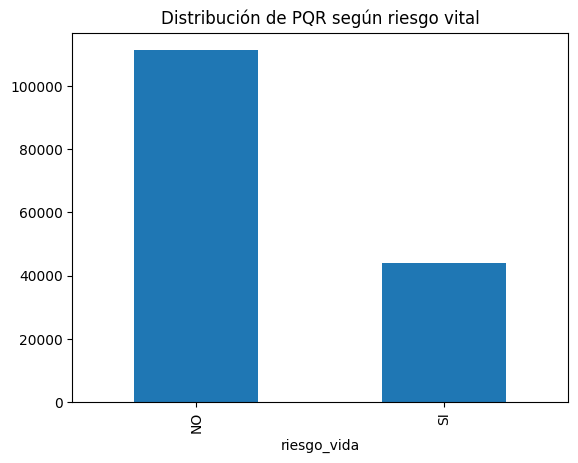

In [36]:
#Análisis univariado
df_cundinamarca["riesgo_vida"].value_counts().plot(kind="bar")
plt.title("Distribución de PQR según riesgo vital")
plt.show()

<Axes: title={'center': 'Distribución por rango de edad afectado'}, ylabel='count'>

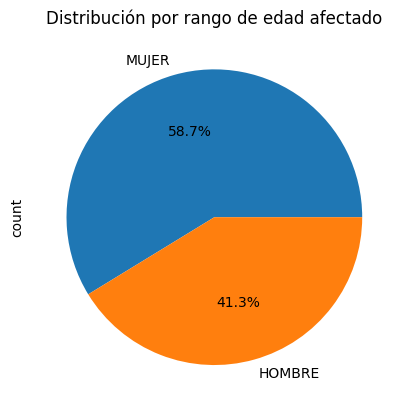

In [37]:
df_cundinamarca["genero_afectado"].describe()
df_cundinamarca["genero_afectado"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Distribución por rango de edad afectado"
)

<Axes: title={'center': 'Top 10 PQR según el canal'}, ylabel='canal_pqr'>

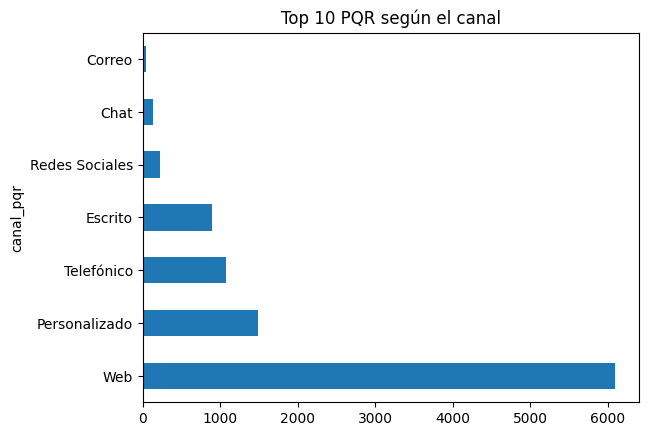

In [65]:
df_cundinamarca["canal_pqr"].value_counts().head(10).plot(
    kind="barh", title="Top 10 PQR según el canal"
)

In [64]:
#Se filtraron únicamente los registros correspondientes a enfermedades crónicas no transmisibles, dado que estas requieren tratamiento farmacológico continuo y presentan mayor impacto en el riesgo vital.
patologias_ecnt = [
    "DIABETES",
    "HTA (HIPERTENSIÓN ARTERIAL)",
    "EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, BRONQUITIS CRÓNICA O ENFISEMA)",
    "ENFERMEDAD ISQUÉMICA CORONARIA",
    "ICC (INSUFICIENCIA CARDÍACA CONGESTIVA)",
    "IRC-ENFERMEDAD RENAL",
    "IRC-TRASPLANTE",
    "OBESIDAD",
    "SOBREPESO",
    "ACV (ACCIDENTE CEREBRO VASCULAR)",
    "ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGÍA",
    "CÁNCER DE MAMA",
    "CÁNCER GÁSTRICO",
    "CÁNCER DE PULMÓN",
    "CÁNCER COLORECTAL",
    "CÁNCER DE ÚTERO",
    "CÁNCER DE PRÓSTATA",
    "ARTRITIS REUMATOIDEA"
]
df_cundinamarca = df_cundinamarca[df_cundinamarca["patologia_tipo"].isin(patologias_ecnt)
].copy()



In [47]:
df_cundinamarca.shape

(21739, 34)

In [66]:
df_cundinamarca["patologia_tipo"].value_counts(normalize=True) * 100

,proportion
patologia_tipo,
DIABETES,36.765445
HTA (HIPERTENSIÓN ARTERIAL),32.526369
IRC-ENFERMEDAD RENAL,5.293822
"EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, BRONQUITIS CRÓNICA O ENFISEMA)",5.113009
ARTRITIS REUMATOIDEA,3.535912
CÁNCER DE MAMA,3.515821
ACV (ACCIDENTE CEREBRO VASCULAR),3.395279
OBESIDAD,2.742341
CÁNCER DE PRÓSTATA,2.451030


<Axes: title={'center': 'Top 10 de patologías'}, ylabel='patologia_tipo'>

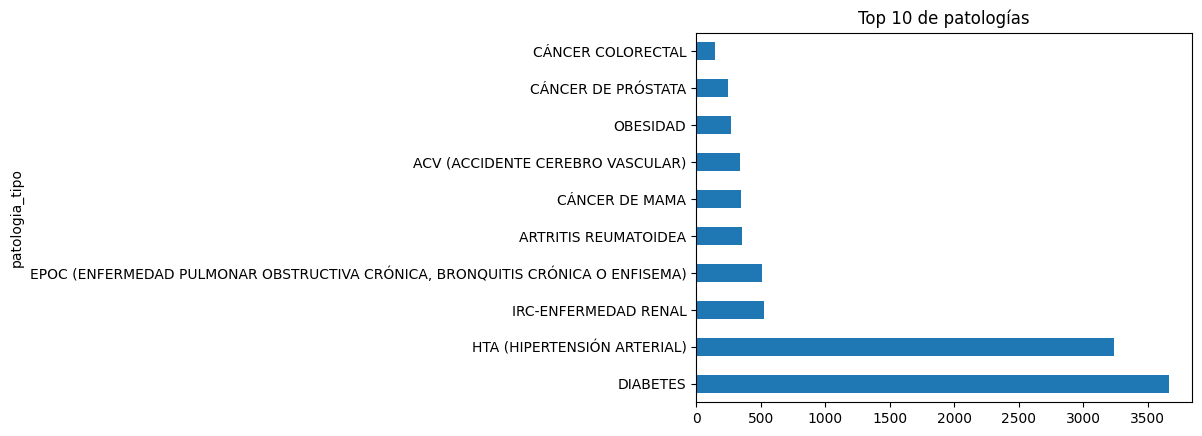

In [67]:
df_cundinamarca["patologia_tipo"].value_counts().head(10).plot(
    kind='barh', title="Top 10 de patologías"
)

In [43]:
df_cundinamarca.shape

(21739, 34)

In [68]:
df_cundinamarca['motivo_especifico'].value_counts()


,count
motivo_especifico,
NEGACIÓN PARA LA ENTREGA DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS AUTORIZADOS,5528
FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA INCOMPLETA DE TECNOLOGÍAS EN SALUD Y/O PRESTACIÓN DE OTROS SERVICIOS,3360
FALTA DE OPORTUNIDAD EN LA AUTORIZACIÓN DE OTROS SERVICIOS DE SALUD,871
NEGACIÓN EN LA AUTORIZACIÓN DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS,191
"INSATISFACCIÓN RELACIONADA CON FALLAS EN EL MANEJO, ALMACENAMIENTO Y/O DISPENSACIÓN DE MEDICAMENTOS Y DISPOSITIVOS MÉDICOS",5


In [69]:
#Se identificaron los motivos específicos asociados a fallas en la entrega y autorización de medicamentos, los cuales fueron utilizados para construir la variable objetivo.
motivos_falla_medicamentos = [
    # Entrega/negación de tecnologías y servicios (incluye medicamentos)
    "NEGACIÓN PARA LA ENTREGA DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS AUTORIZADOS",
    "FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA INCOMPLETA DE TECNOLOGÍAS EN SALUD Y/O PRESTACIÓN DE OTROS SERVICIOS",

    # Autorización de medicamentos
    "FALTA DE OPORTUNIDAD EN LA AUTORIZACIÓN DE OTROS SERVICIOS DE SALUD",
    "NEGACIÓN EN LA AUTORIZACIÓN DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS",

    # Problemas directos con entrega de medicamentos/dispositivos
    "INSATISFACCIÓN RELACIONADA CON FALLAS EN EL MANEJO, ALMACENAMIENTO Y/O DISPENSACIÓN DE MEDICAMENTOS Y DISPOSITIVOS MÉDICOS",
]


In [70]:
df_cundinamarca = df_cundinamarca[
    df_cundinamarca["motivo_especifico"].isin(motivos_falla_medicamentos)
].copy()


In [71]:
df_cundinamarca.shape

(9955, 35)

In [72]:
df_cundinamarca['motivo_especifico'].value_counts()

,count
motivo_especifico,
NEGACIÓN PARA LA ENTREGA DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS AUTORIZADOS,5528
FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA INCOMPLETA DE TECNOLOGÍAS EN SALUD Y/O PRESTACIÓN DE OTROS SERVICIOS,3360
FALTA DE OPORTUNIDAD EN LA AUTORIZACIÓN DE OTROS SERVICIOS DE SALUD,871
NEGACIÓN EN LA AUTORIZACIÓN DE TECNOLOGÍAS EN SALUD Y/O DE OTROS SERVICIOS,191
"INSATISFACCIÓN RELACIONADA CON FALLAS EN EL MANEJO, ALMACENAMIENTO Y/O DISPENSACIÓN DE MEDICAMENTOS Y DISPOSITIVOS MÉDICOS",5


In [73]:
def clasificar_tipo_falla(motivo):
    # Falta de oportunidad en entrega o fraccionamiento
    if "FALTA DE OPORTUNIDAD" in motivo or "FRACCIONAMIENTO" in motivo:
        return "Falta de oportunidad en entrega"

    # Falta de medicamentos o entrega incompleta (casos específicos)
    if "ENTREGA INCOMPLETA" in motivo or "FRACCIONAMIENTO" in motivo:
        return "Falta de medicamentos y entrega incompleta"

    # Demora en autorización
    elif "DEMORA DE LA AUTORIZACION" in motivo:
        return "Demora en autorización"

    # Negación de autorización
    elif "NEGACIÓN EN LA AUTORIZACIÓN" in motivo or "NEGACIÓN DE LA AUTORIZACIÓN" in motivo:
        return "Negación de autorización"

    # Negación de entrega (incluye tecnologías en salud o servicios)
    elif "NEGACIÓN PARA LA ENTREGA" in motivo or "NEGACIÓN EN LA ENTREGA" in motivo:
        return "Negación de entrega"

    # Alto costo o enfermedades raras / huérfanas
    elif "ALTO COSTO" in motivo or "RARAS" in motivo or "HUÉRFANAS" in motivo:
        return "Alto costo"

    # Fallas directas en manejo, almacenamiento o dispensación de medicamentos/dispositivos
    elif "FALLAS EN EL MANEJO, ALMACENAMIENTO Y/O DISPENSACIÓN DE MEDICAMENTOS" in motivo:
        return "Fallas en manejo/dispensación"

    # Otros casos
    else:
        return "Otro"

# Aplicar al DataFrame
df_cundinamarca["tipo_falla"] = df_cundinamarca["motivo_especifico"].apply(clasificar_tipo_falla)



In [58]:
df_cundinamarca['tipo_falla'].value_counts()

,count
tipo_falla,
Negación de entrega,5528
Falta de oportunidad en entrega,4231
Negación de autorización,191
Fallas en manejo/dispensación,5


In [59]:
from google.colab import drive
drive.mount('/content/drive')

df_cundinamarca.to_csv(
    "/content/drive/MyDrive/Analitica/pqr_falla_entrega_medicamentos_cundi.csv",
    index=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
